In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('data/ЛР4_Ирисы Фишера.csv', encoding='ISO-8859-1', sep=';')

In [3]:
df.columns = ['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка', 'Вид ириса']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Длина чашелистика   150 non-null    object
 1   Ширина чашелистика  150 non-null    object
 2   Длина лепестка      150 non-null    object
 3   Ширина лепестка     150 non-null    object
 4   Вид ириса           150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [5]:
for col in df.columns[:-1]:
    df[col] = df[col].map(lambda x: float(str(x).replace(',', '.')))

In [6]:
df.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Вид ириса
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
labels = df['Вид ириса']
X = df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']]
norm_X = normalize(X)
norm_dfX = pd.DataFrame(norm_X, index=df.index, columns=X.columns)

In [8]:
norm_dfX.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [9]:
sorts = tuple(np.unique(labels))
print(sorts)

('setosa', 'versicolor', 'virginica')


In [10]:
X.corr()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
Длина чашелистика,1.000000,-0.117570,0.871754,0.817941
Ширина чашелистика,-0.117570,1.000000,-0.428440,-0.366126
Длина лепестка,0.871754,-0.428440,1.000000,0.962865
Ширина лепестка,0.817941,-0.366126,0.962865,1.000000


Общая корреляция

<Axes: >

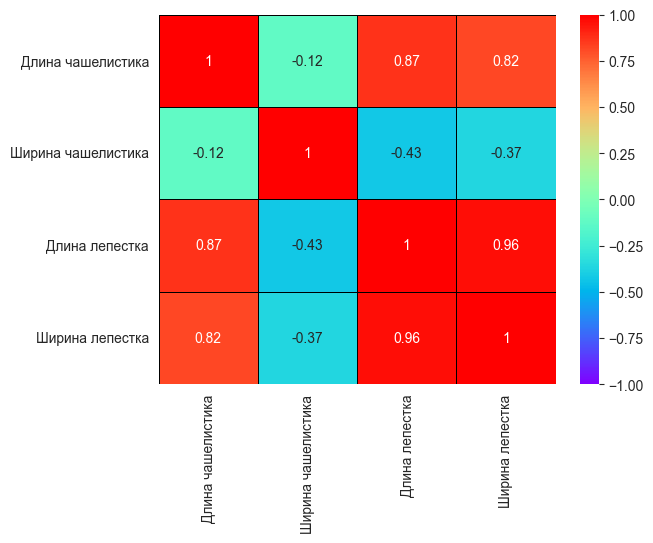

In [11]:
sns.heatmap(X.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='rainbow', vmin=-1, vmax=1)

Корреляция для каждого сорта

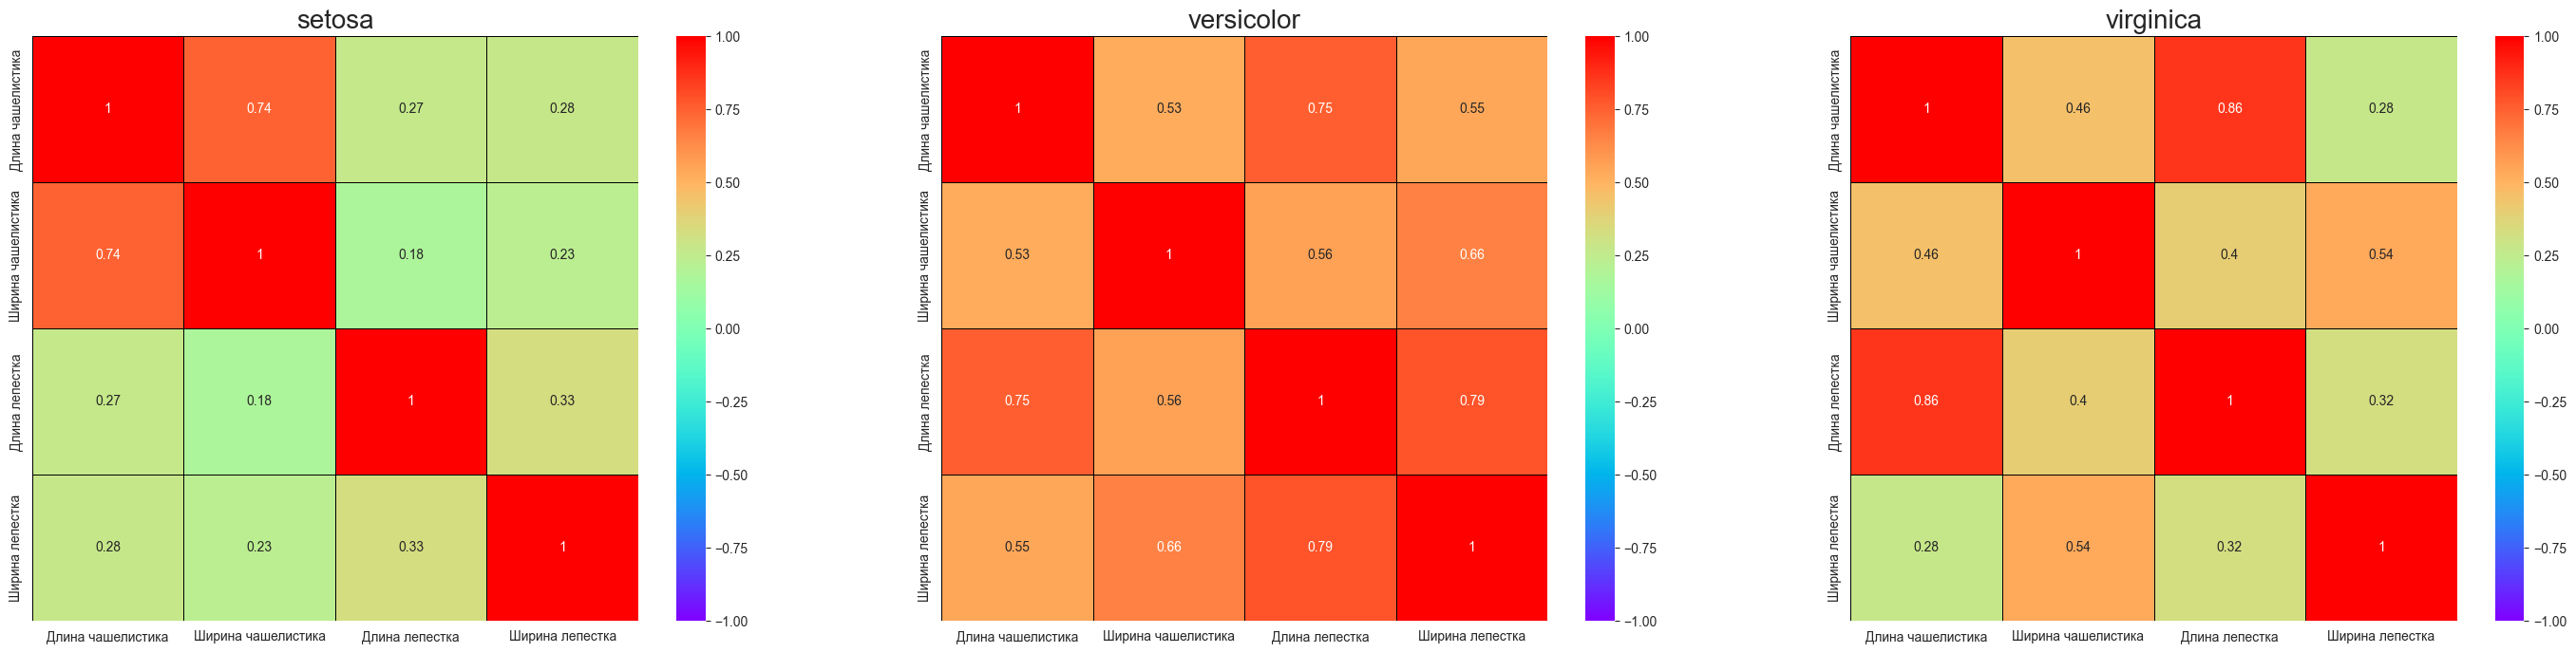

In [12]:
plt.figure(figsize=(35, 8))

for i, sort in enumerate(sorts):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(X[df['Вид ириса'] == sort].corr(), annot=True, linewidths=0.5, linecolor='black', cmap='rainbow', vmin=-1, vmax=1)
    plt.title(sort, size=20)

plt.show()

Гистограммы параметров: для всех и отдельно по сортам

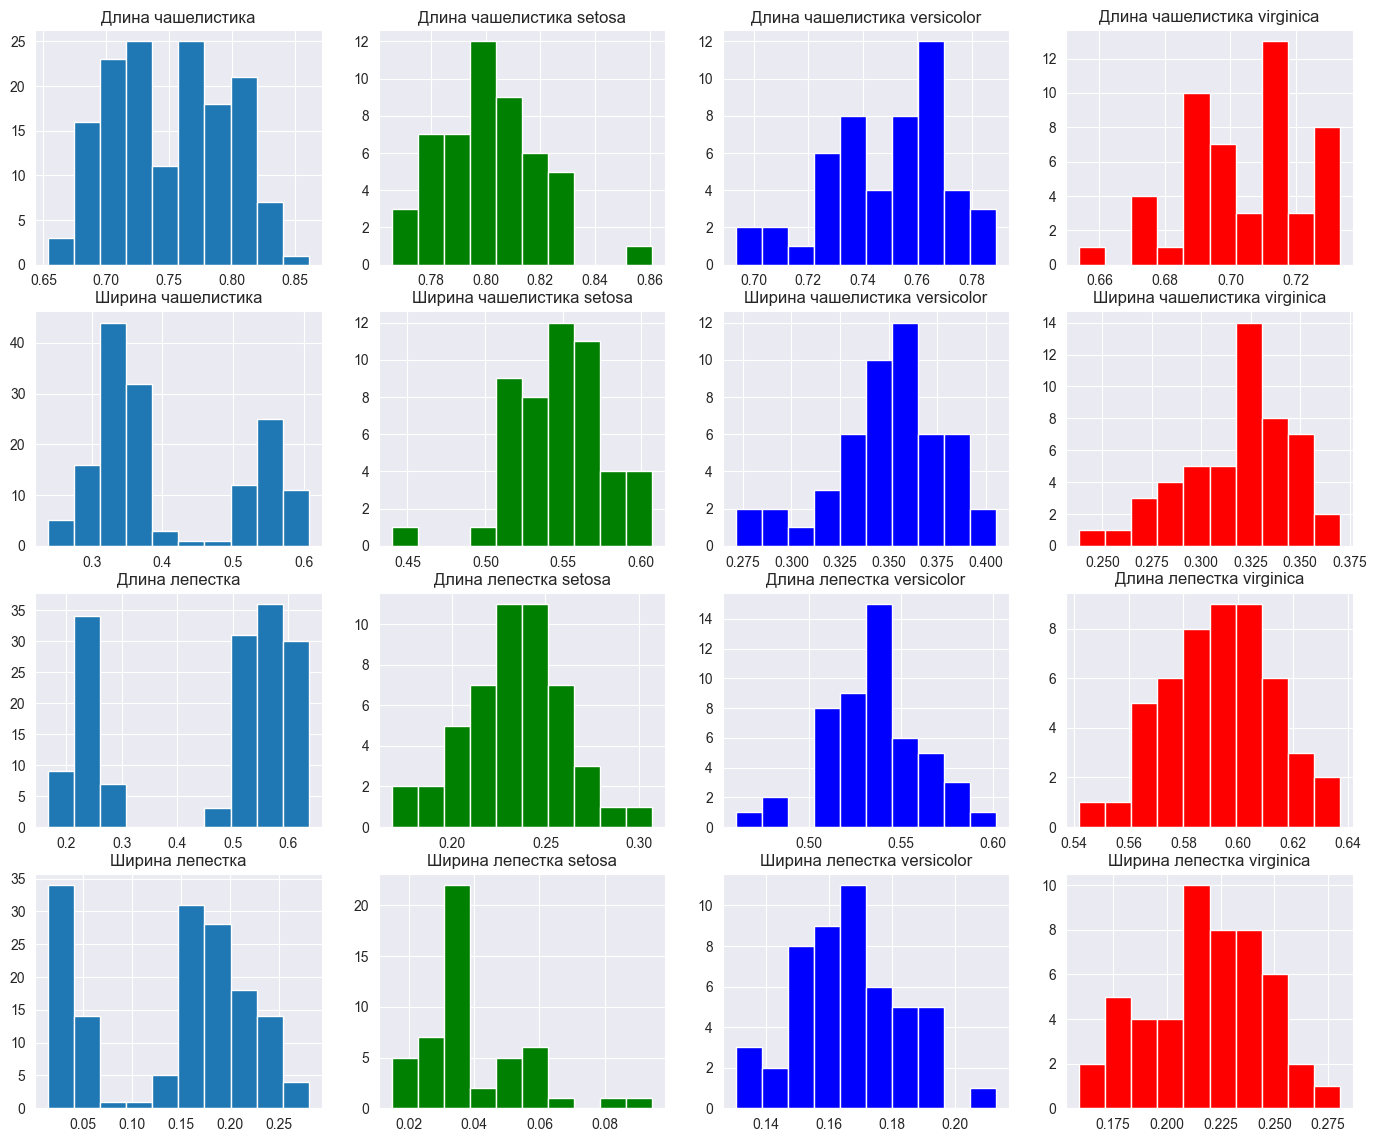

In [13]:
plt.figure(figsize=(17, 14))
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, (i * (len(sorts) + 1) + 1))
    plt.hist(norm_dfX[col])
    plt.title(col)

    for j, (sort, color) in enumerate(zip(sorts, ['green', 'blue', 'red'])):
        plt.subplot(4, 4, (i * (len(sorts) + 1) + j + 2))
        plt.hist(norm_dfX[col][df['Вид ириса'] == sort], color=color)
        plt.title(col + ' ' + sort)
plt.show()

Гистограмма по параметрам вместе и по разными сортам на одном графике

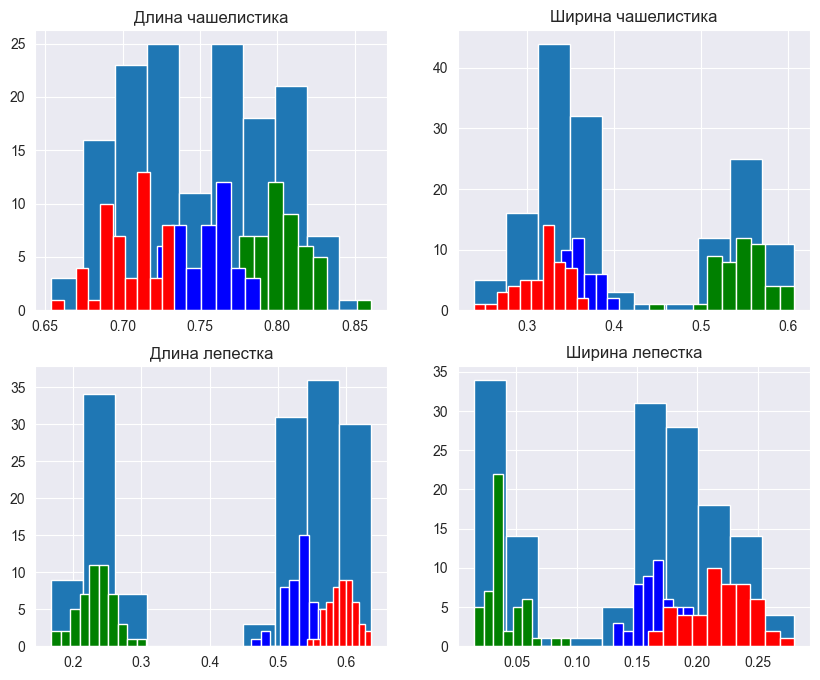

In [14]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, (i + 1))
    plt.hist(norm_dfX[col])

    for j, (sort, color) in enumerate(zip(sorts, ['green', 'blue', 'red'])):
        plt.hist(norm_dfX[col][df['Вид ириса'] == sort], color=color)

    plt.title(col)

plt.show()

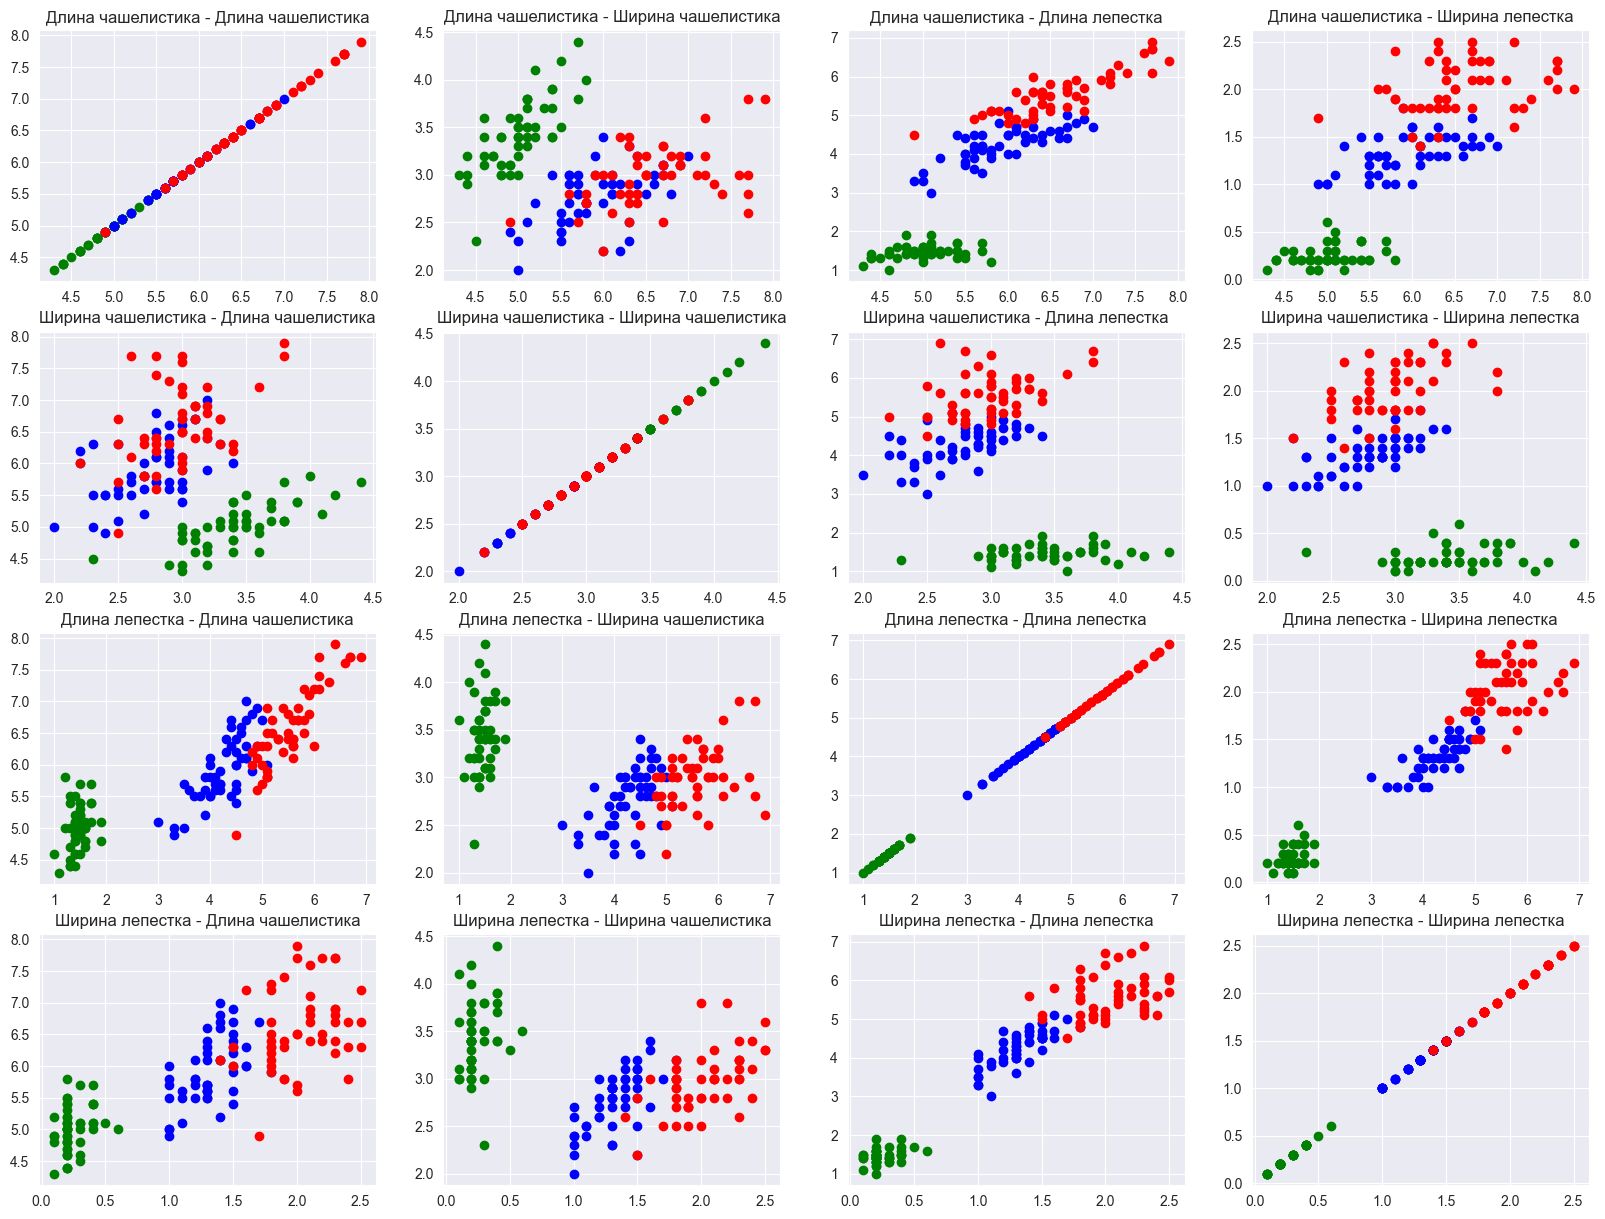

In [15]:
plt.figure(figsize=(20, 15))

for i, col_i in enumerate(X.columns):
    for j, col_j in enumerate(X.columns):
        plt.subplot(4, 4, i * 4 + j + 1)

        for sort, color in zip(sorts, ['green', 'blue', 'red']):
            plt.scatter(X[col_i][df['Вид ириса'] == sort], X[col_j][df['Вид ириса'] == sort], color=color)

        plt.title(col_i + ' - ' + col_j)

plt.show()

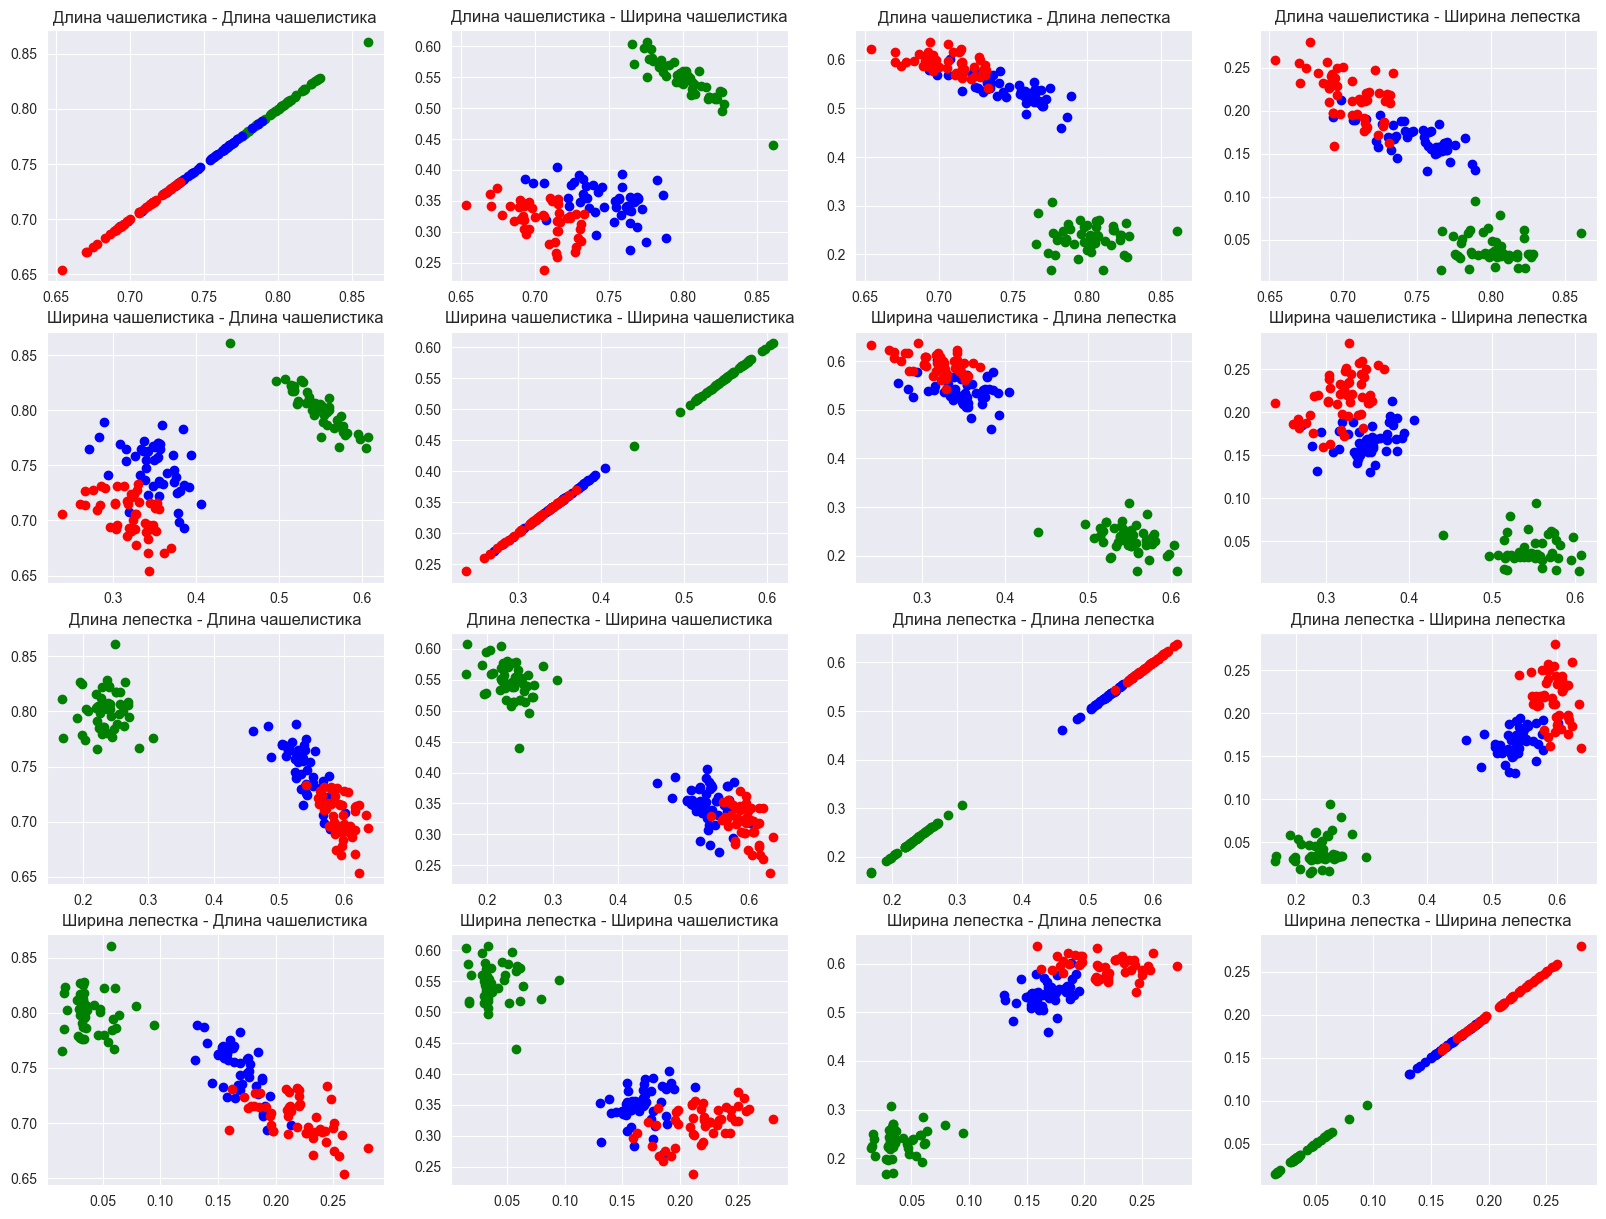

In [16]:
plt.figure(figsize=(20, 15))

for i, col_i in enumerate(X.columns):
    for j, col_j in enumerate(X.columns):
        plt.subplot(4, 4, i * 4 + j + 1)

        for sort, color in zip(sorts, ['green', 'blue', 'red']):
            plt.scatter(norm_dfX[col_i][df['Вид ириса'] == sort], norm_dfX[col_j][df['Вид ириса'] == sort], color=color)

        plt.title(col_i + ' - ' + col_j)

plt.show()

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(norm_X, labels, test_size=0.6, random_state=42)

In [18]:
gauss = GaussianNB()
gauss.fit(train_X, train_Y)

GaussianNB()

In [19]:
pred_y = gauss.predict(test_X)

In [20]:
s = 0
ve = 0
vi = 0

for p in test_Y:
    if p == 'setosa':
        s += 1
    elif p == 'versicolor':
        ve += 1
    elif p == 'virginica':
        vi += 1
print(s, ve, vi)

35 29 26


In [21]:
confusion_matrix(test_Y, pred_y, labels=sorts)

array([[35,  0,  0],
       [ 0, 26,  3],
       [ 0,  0, 26]], dtype=int64)

In [22]:
def print_metrics(title: str, tn: int, fp: int, fn: int, tp: int) -> None:
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    print(
        f'Class: {title}\n'
        f'Precision: {round(precision, 3)}\n'
        f'Recall: {round(recall, 3)}\n'
        f'F1-score: {round(f1, 3)}\n'
        f'Accuracy: {round(accuracy, 3)}'
    )

In [23]:
print_metrics('setosa', tp=35, fp=0, fn=0, tn=55)
print()
print_metrics('versicolor', tp=26, fp=0, fn=3, tn=61)
print()
print_metrics('virginica', tp=26, fp=3, fn=0, tn=61)

Class: setosa
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 1.0

Class: versicolor
Precision: 1.0
Recall: 0.897
F1-score: 0.945
Accuracy: 0.967

Class: virginica
Precision: 0.897
Recall: 1.0
F1-score: 0.945
Accuracy: 0.967


In [24]:
total_precision = precision_score(test_Y, pred_y, average='weighted')
total_recall = recall_score(test_Y, pred_y, average='weighted')
total_f1 = f1_score(test_Y, pred_y, average='weighted')
total_accuracy = accuracy_score(test_Y, pred_y)

print(
    f'Precision: {round(total_precision, 3)}\n'
    f'Recall: {round(total_recall, 3)}\n'
    f'F1-score: {round(total_f1, 3)}\n'
    f'Accuracy: {round(total_accuracy, 3)}'
)

Precision: 0.97
Recall: 0.967
F1-score: 0.967
Accuracy: 0.967
